# Analisa Statistik - uji stasioneritas

In [1]:
# pustaka untuk manipulasi data
import pandas as pd
from pandas import concat
from pandas import DataFrame
from pandas import read_csv
from pandas import read_excel
import numpy as np
from numpy import concatenate

# pustaka untuk waktu komputasi
import time
from datetime import datetime

# Pustaka untuk visualisasi data
import seaborn as sns
from matplotlib import pyplot
from matplotlib import pyplot as plt

# Pustaka untuk visualisasi acf dan pacf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

# pustaka normalisasi data / membuat data latih dan data uji.
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import minmax_scaling

# pustaka uji stasioneritas statsmodel
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# pustaka uji stasioneritas arch
from arch.unitroot import *
from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

### 1. Akuisisi Data

In [2]:
# Set waktu komputasi
start = time.time()

In [3]:
# fix random seed for reproducibility
np.random.seed(1234)

In [4]:
dataset = pd.read_csv("dataset/dataset_boptn.csv", parse_dates=["acq_date"])

In [5]:
# # set index tanggal
# dataset = dataset.set_index("tanggal")

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acq_date  276 non-null    datetime64[ns]
 1   hotspot   276 non-null    int64         
 2   soi_anom  276 non-null    float64       
 3   soi_std   276 non-null    float64       
 4   sst_anom  276 non-null    float64       
 5   sst_std   276 non-null    float64       
 6   oni_anom  276 non-null    float64       
 7   oni_std   276 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 17.4 KB


In [7]:
dataset

,acq_date,hotspot,soi_anom,soi_std,sst_anom,sst_std,oni_anom,oni_std
0,2001-01-31,3,1.6,1.0,-0.76,25.81,-0.68,25.88
1,2001-02-28,5,2.8,1.7,-0.56,26.18,-0.52,26.26
2,2001-03-31,10,1.5,0.9,-0.37,26.86,-0.44,26.76
3,2001-04-30,20,0.3,0.2,-0.56,27.24,-0.34,27.25
4,2001-05-31,39,-0.8,-0.5,-0.46,27.42,-0.25,27.49
...,...,...,...,...,...,...,...,...
271,2023-08-31,186,-1.4,-0.8,1.30,28.20,1.32,28.28
272,2023-09-30,2247,-2.1,-1.3,1.53,28.29,1.56,28.32
273,2023-10-31,3200,-0.8,-0.5,1.59,28.36,1.78,28.49
274,2023-11-30,390,-1.3,-0.8,1.90,28.72,1.92,28.60


### 2. Normalisasi Data (Max-Min)

In [8]:
# memanggil fungsi max min scaler
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [9]:
# proses max min scaler
scaled = scaler.fit_transform(dataset[["hotspot", "soi_anom", "soi_std", "sst_anom", "sst_std", "oni_anom", "oni_std"]])

In [10]:
scaled = pd.DataFrame(scaled)
scaled.columns = ["hotspot", "soi_anom", "soi_std", "sst_anom", "sst_std", "oni_anom", "oni_std"]

In [11]:
df_normalisasi = pd.concat([dataset[["acq_date"]], scaled], axis=1)


In [12]:
df_normalisasi

,acq_date,hotspot,soi_anom,soi_std,sst_anom,sst_std,oni_anom,oni_std
0,2001-01-31,0.000000,0.68,0.683333,0.192575,0.183807,0.224299,0.206573
1,2001-02-28,0.000139,0.80,0.800000,0.238979,0.264770,0.261682,0.295775
2,2001-03-31,0.000485,0.67,0.666667,0.283063,0.413567,0.280374,0.413146
3,2001-04-30,0.001178,0.55,0.550000,0.238979,0.496718,0.303738,0.528169
4,2001-05-31,0.002494,0.44,0.433333,0.262181,0.536105,0.324766,0.584507
...,...,...,...,...,...,...,...,...
271,2023-08-31,0.012678,0.38,0.383333,0.670534,0.706783,0.691589,0.769953
272,2023-09-30,0.155466,0.31,0.300000,0.723898,0.726477,0.747664,0.779343
273,2023-10-31,0.221491,0.44,0.433333,0.737819,0.741794,0.799065,0.819249
274,2023-11-30,0.026812,0.39,0.383333,0.809745,0.820569,0.831776,0.845070


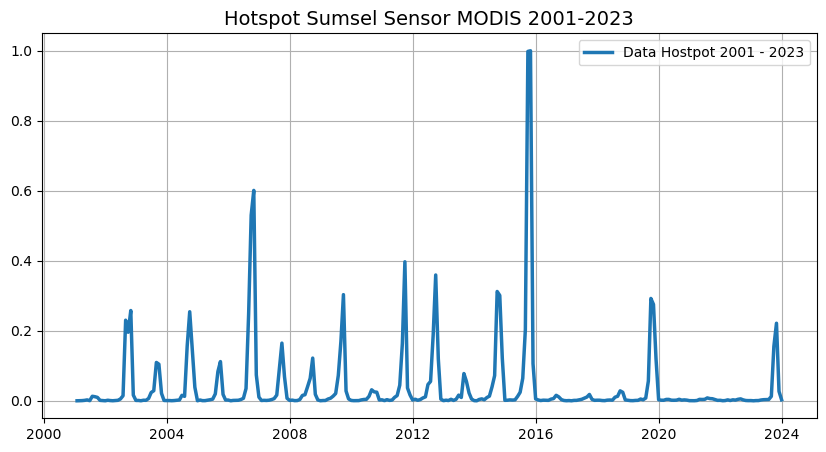

In [13]:
# membuat frame
fig, ax = plt.subplots(figsize = (10,5))

# membuat time series plot
ax.plot(df_normalisasi["acq_date"], df_normalisasi["hotspot"], color="tab:blue", label="Data Hostpot 2001 - 2023", linewidth=2.5)

# membuat label-label
ax.set_title("Hotspot Sumsel Sensor MODIS 2001-2023", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc='best')
ax.grid(True)

# menampilkan plot
plt.show()

In [14]:
#df_normalisasi.to_csv("dataset/dataset_boptn_norm.csv", index=False)

### 3. Plot ACF dan PACF

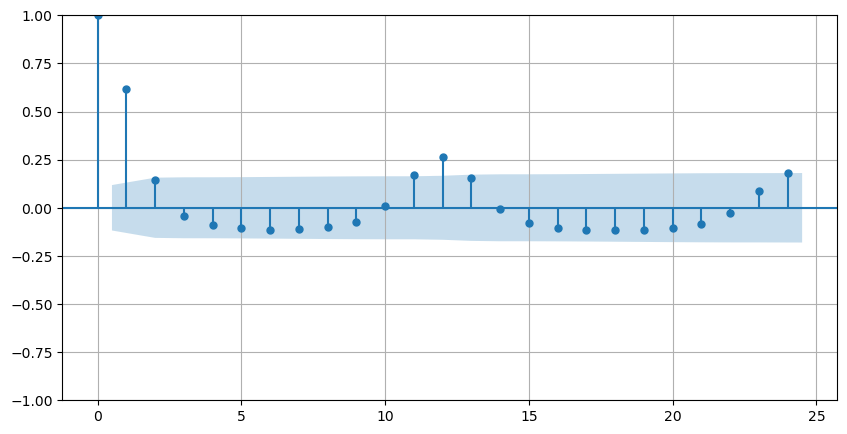

In [24]:
# membuat frame
fig, ax = plt.subplots(figsize = (10,5))

# membuat time series plot
plot_acf(df_normalisasi["hotspot"], lags=24, ax=ax)

# membuat label-label
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

# menampilkan plot
plt.show()

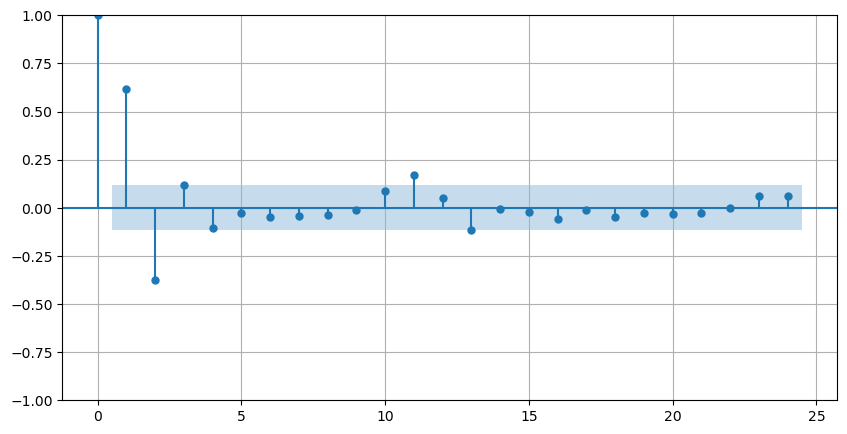

In [25]:
# membuat frame
fig, ax = plt.subplots(figsize = (10,5))

# membuat time series plot
plot_pacf(df_normalisasi["hotspot"], lags=24, ax=ax)

# membuat label-label
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

# menampilkan plot
plt.show()

### Uji-Stasioneritas (Statsmodels)

**ADF Test with statsmodel**
- https://machinelearningmastery.com/time-series-data-stationary-python/
- https://docs.w3cub.com/statsmodels/generated/statsmodels.tsa.stattools.adfuller
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [17]:
# Formula ADF Test
# result = adfuller(df_sumsel, maxlag=24, autolag='AIC')
result = adfuller(df_normalisasi["hotspot"], autolag=None)

# print result ADF Tes 
print("----------------------------------")
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'n-lags: {result[2]}')
print(f'n-obs: {result[3]}')

print("----------------------------------")
print('Critial Values:')
for key, value in result[4].items():
    print(f'   {key}, {value}')

----------------------------------
ADF Statistic: -3.9778140200790393
p-value: 0.0015312444243415905
n-lags: 16
n-obs: 259
----------------------------------
Critial Values:
   1%, -3.4558530692911504
   5%, -2.872764881778665
   10%, -2.572751643088207


In [18]:
if result[1] <= 0.05:
    print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
else:
    print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary.')

Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary


### Uji-Stasioneritas (ARCH toolbox)

**ADF Test with ARCH toolbox**
- https://arch.readthedocs.io/en/latest/unitroot/generated/arch.unitroot.ADF.html

Hipotesis 0 (H0): data terdapat akar unit. Artinya data bersifat non-stasioner\
Hipotesis 1 (H1): data terdapat tidak akar unit. Artinya data bersifat stasioner

Jika p-value > 0.05 => Terima H0\
Jika p-value <= 0.05 => Terima H1 

In [19]:
adf = ADF(df_normalisasi["hotspot"], lags=15)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.061
P-value                         0.001
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [20]:
# check linier regression with OLS
reg_res = adf.regression
print(reg_res.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     8.848
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           5.89e-17
Time:                        07:42:02   Log-Likelihood:                 279.37
No. Observations:                 260   AIC:                            -524.7
Df Residuals:                     243   BIC:                            -464.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.5437      0.134     -4.061      0.0

**PP Test with ARCH toolbook**
- https://arch.readthedocs.io/en/latest/unitroot/generated/arch.unitroot.PhillipsPerron.html

Hipotesis 0 (H0): data terdapat akar unit. Artinya data bersifat non-stasioner\
Hipotesis 1 (H1): data terdapat tidak akar unit. Artinya data bersifat stasioner

Jika p-value > 0.05 => Terima H0\
Jika p-value <= 0.05 => Terima H1 

In [21]:
pp = PhillipsPerron(df_normalisasi["hotspot"], lags=15)
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -7.001
P-value                         0.000
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [22]:
# check linier regression with OLS
reg_res = pp.regression
print(reg_res.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     116.2
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           8.36e-23
Time:                        07:42:02   Log-Likelihood:                 269.41
No. Observations:                 275   AIC:                            -534.8
Df Residuals:                     273   BIC:                            -527.6
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1       0.6157      0.057     10.779      0.0

**KPSS Test with ARCH toolbook**
- https://arch.readthedocs.io/en/latest/unitroot/generated/arch.unitroot.KPSS.html

Hipotesis 0 (H0): data bersifat stasioner\
Hipotesis 1 (H1): data bersifat non-stasioner

In [23]:
kpss = KPSS(df_normalisasi["hotspot"], lags=15)
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.105
P-value                         0.562
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
